![bees](bees.jpg)

# Bee Haven Revealed: Unlocking the Top Plant Species for Thriving Pollinator Bee Populations

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `species_num` | The number of different bee species in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plant. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## Introduction

Unveiling the Secrets to a Flourishing Pollinator Paradise: Discover the Key Plant Species that Nourish and Sustain pollinator Bee Populations

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, HTML
import numpy as np
from PIL import Image
import base64
import io


data = pd.read_csv("data/plants_and_bees.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       1250 non-null   int64  
 1   species_num     1250 non-null   int64  
 2   date            1250 non-null   object 
 3   season          1250 non-null   object 
 4   site            1250 non-null   object 
 5   native_or_non   1250 non-null   object 
 6   sampling        1250 non-null   object 
 7   plant_species   1250 non-null   object 
 8   time            1250 non-null   int64  
 9   bee_species     1250 non-null   object 
 10  sex             1250 non-null   object 
 11  specialized_on  7 non-null      object 
 12  parasitic       1187 non-null   float64
 13  nesting         1196 non-null   object 
 14  status          15 non-null     object 
 15  nonnative_bee   1189 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 156.4+ KB


In [173]:
#preview of rows and columns in the dataset
data.head(50)

sample_id  species_num        date  ...            nesting status nonnative_bee
0       17400           23  04/18/2017  ...             ground    NaN           0.0
1       17400           23  04/18/2017  ...             ground    NaN           0.0
2       17400           23  04/18/2017  ...             ground    NaN           0.0
3       17400           23  04/18/2017  ...             ground    NaN           0.0
4       17400           23  04/18/2017  ...             ground    NaN           0.0
5       17400           23  04/18/2017  ...               hive    NaN           1.0
6       17400           23  04/18/2017  ...               hive    NaN           1.0
7       17400           23  04/18/2017  ...               hive    NaN           1.0
8       17400           23  04/18/2017  ...               hive    NaN           1.0
9       17400           23  04/18/2017  ...               hive    NaN           1.0
10      17400           23  04/18/2017  ...               hive    NaN           1.0
11      17400           23  04/18/2017  ...             ground    NaN           0.0
12      17400           23  04/18/2017  ...             ground    NaN           0.0
13      17400           23  04/18/2017  ...             ground    NaN           0.0
14      17400           23  04/18/2017  ...             ground    NaN           0.0
15      17400           23  04/18/2017  ...             ground    NaN           0.0
16      17400           23  04/18/2017  ...             ground    NaN           0.0
17      17400           23  04/18/2017  ...               wood    NaN           0.0
18      17400           23  04/18/2017  ...             ground    NaN           0.0
19      17400           23  04/18/2017  ...               wood    NaN           0.0
20      17400           23  04/18/2017  ...             ground    NaN           0.0
21      17400           23  04/18/2017  ...             ground    NaN           0.0
22      17400           23  04/18/2017  ...             ground    NaN           0.0
23      17401           20  04/18/2017  ...             ground    NaN           0.0
24      17401           20  04/18/2017  ...               wood    NaN           0.0
25      17401           20  04/18/2017  ...               wood    NaN           0.0
26      17401           20  04/18/2017  ...             ground    NaN           0.0
27      17401           20  04/18/2017  ...             ground    NaN           0.0
28      17401           20  04/18/2017  ...             ground    NaN           0.0
29      17401           20  04/18/2017  ...               wood    NaN           0.0
30      17401           20  04/18/2017  ...               wood    NaN           0.0
31      17401           20  04/18/2017  ...               wood    NaN           0.0
32      17401           20  04/18/2017  ...  parasite [ground]    NaN           0.0
33      17401           20  04/18/2017  ...             ground    NaN           0.0
34      17401           20  04/18/2017  ...             ground    NaN           0.0
35      17401           20  04/18/2017  ...             ground    NaN           0.0
36      17401           20  04/18/2017  ...             ground    NaN           0.0
37      17401           20  04/18/2017  ...               wood    NaN           0.0
38      17401           20  04/18/2017  ...               hive    NaN           1.0
39      17401           20  04/18/2017  ...               wood    NaN           0.0
40      17401           20  04/18/2017  ...               hive    NaN           1.0
41      17401           20  04/18/2017  ...               hive    NaN           1.0
42      17401           20  04/18/2017  ...             ground    NaN           0.0
43      17402           20  04/18/2017  ...             ground    NaN           0.0
44      17402           20  04/18/2017  ...             ground    NaN           0.0
45      17402           20  04/18/2017  ...             ground    NaN           0.0
46      17402           20  04/18/2017  ...  parasite [g

In [174]:
specialization_counts=data['specialized_on'].value_counts()
print(specialization_counts)

Penstemon    5
Ipomoea      2
Name: specialized_on, dtype: int64


# Which plants are preferred by native vs non-native bee species?

In [175]:
#Separating Native and Non-Native Bee Species
native_species = data[data['nonnative_bee']==0]
non_native_species = data[data['nonnative_bee']==1]

In [176]:
# Group the data by plant species and calculate the counts for each group
native_counts = native_species['plant_species'].value_counts(dropna=False)
non_native_counts = non_native_species['plant_species'].value_counts(dropna=False)

In [177]:
# Display the value counts for native and non-native bee species
print("Native Bee Species - Preferred Plant Species:")
print(native_counts)

print("\nNon-Native Bee Species - Preferred Plant Species:")
print(non_native_counts)

Native Bee Species - Preferred Plant Species:
None                        762
Leucanthemum vulgare        102
Rudbeckia hirta              51
Daucus carota                31
Cichorium intybus            25
Chamaecrista fasciculata     23
Trifolium pratense           21
Helenium flexuosum           19
Melilotus officinalis        16
Penstemon digitalis          15
Asclepias tuberosa           13
Coronilla varia              12
Rudbeckia triloba            12
Monarda punctata             10
Cosmos bipinnatus             9
Trifolium repens              6
Lobularia maritima            5
Agastache foeniculum          5
Pycnanthemum tenuifolium      4
Viola cornuta                 3
Tradescantia virginiana       3
Lotus corniculatus            3
Trifolium incarnatum          2
Origanum vulgare              2
Name: plant_species, dtype: int64

Non-Native Bee Species - Preferred Plant Species:
None                    33
Trifolium incarnatum     1
Daucus carota            1
Name: plant_species,

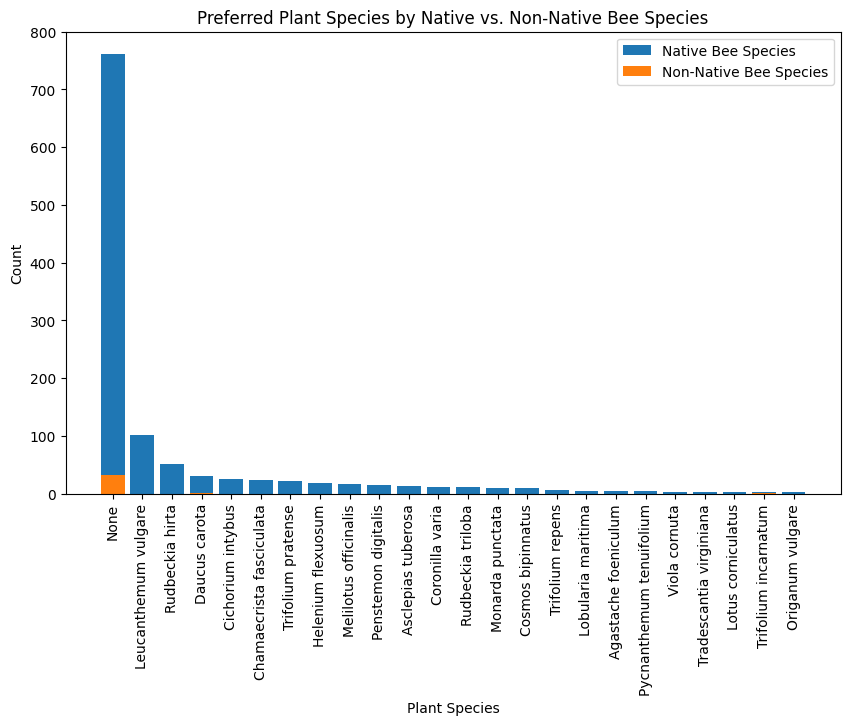

In [178]:
# Plot the preferred plant species for native and non-native bee species
plt.figure(figsize=(10, 6))

# Plot for native bee species
plt.bar(native_counts.index, native_counts.values, label='Native Bee Species')

# Plot for non-native bee species
plt.bar(non_native_counts.index, non_native_counts.values, label='Non-Native Bee Species')

plt.xlabel('Plant Species')
plt.ylabel('Count')
plt.title('Preferred Plant Species by Native vs. Non-Native Bee Species')
plt.xticks(rotation=90)
plt.legend()

plt.show()

Based on the above chart, here are the preferred plant species for native and non-native bee species:

Preferred Plant Species for Native Bee Species:

- **None** (762 occurrences)
- Leucanthemum vulgare (102 occurrences)
- Rudbeckia hirta (51 occurrences)
- Daucus carota (31 occurrences)
- Cichorium intybus (25 occurrences)
- Chamaecrista fasciculata (23 occurrences)
- Trifolium pratense (21 occurrences)
- Helenium flexuosum (19 occurrences)
- Melilotus officinalis (16 occurrences)
- Penstemon digitalis (15 occurrences)
- Asclepias tuberosa (13 occurrences)
- Coronilla varia (12 occurrences)
- Rudbeckia triloba (12 occurrences)
- Monarda punctata (10 occurrences)
- Cosmos bipinnatus (9 occurrences)
- Trifolium repens (6 occurrences)
- Lobularia maritima (5 occurrences)
- Agastache foeniculum (5 occurrences)
- Pycnanthemum tenuifolium (4 occurrences)
- Viola cornuta (3 occurrences)
- Tradescantia virginiana (3 occurrences)
- Lotus corniculatus (3 occurrences)
- Trifolium incarnatum (2 occurrences)
- Origanum vulgare (2 occurrences)

Preferred Plant Species for Non-Native Bee Species:

- **None** (33 occurrences)
- Trifolium incarnatum (1 occurrence)
- Daucus carota (1 occurrence)

These lists show me the plant species preferred by native and non-native bee species. However,  based on the counts in the dataset, the "None" category is highest. This could indicate that in those instances, the samples were taken from the air rather than from a specific plant species.

# Distribution of bee and plant species

Searching for sample ID with greatest number of instances in the dataset to plot and visualize best distribution

In [179]:
#Value Counts on Sample ID
sample_counts = data['sample_id'].value_counts()

#Get the sample ID with the highest count
max_count_sample_id=sample_counts.idxmax()

#Print the sample ID with the highest count
print("Sample ID with the highest count:", max_count_sample_id)


Sample ID with the highest count: 17446


Visualizing sample ID with highest count

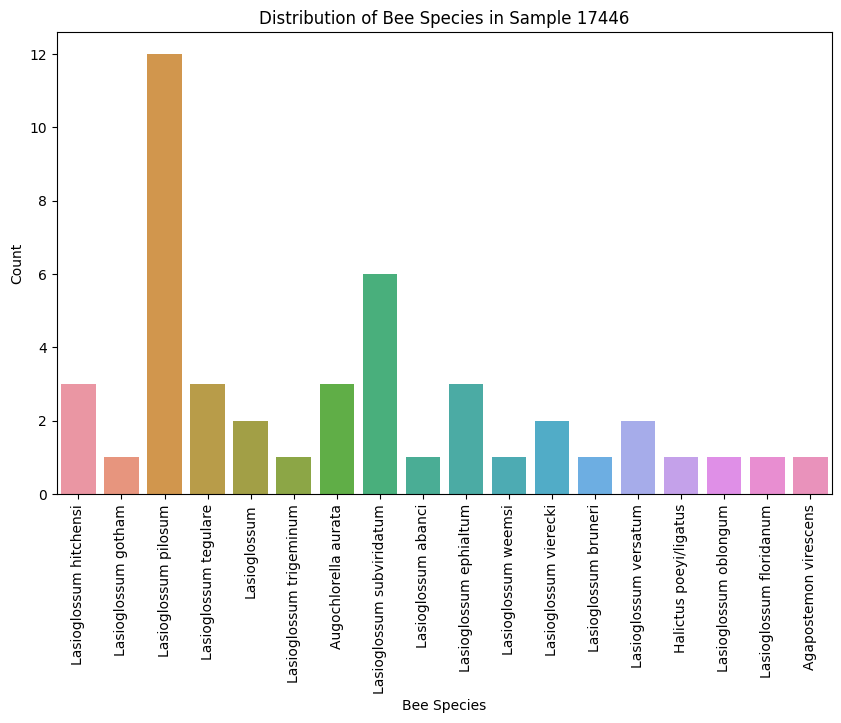

In [180]:
#Sample ID to Visualize
sample_id = 17446

#Filter the data for the chosen sample ID
sample_data = data[data['sample_id']==sample_id]

#Create a countplot for bee species
plt.figure(figsize=(10,6))
sns.countplot(data=sample_data, x='bee_species')
plt.xlabel('Bee Species')
plt.ylabel('Count')
plt.title('Distribution of Bee Species in Sample 17446'.format(sample_id))
plt.xticks(rotation=90)
plt.show()

## BONUS VISUAL (Compatible with Jupyter Labs Notebook, not DataCamp Editor):

In Jupyter there will be a dropdown included with all of the sample IDs that can be viewed. Unfortunately, DataCamps editor did not have the ability to display drop down 

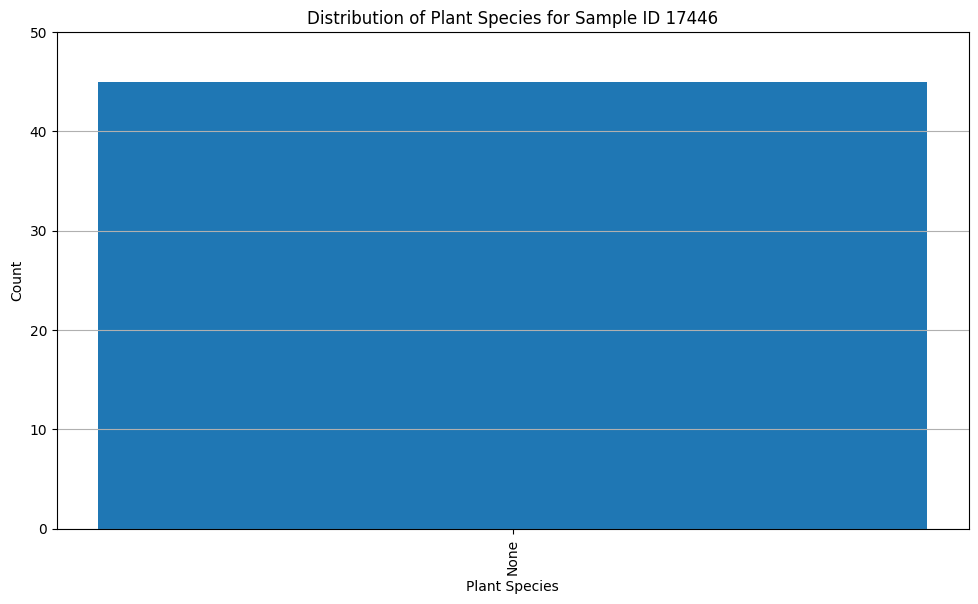

Sample ID: 17446
Number of Plant Species: 1


interactive(children=(Dropdown(description='Sample ID:', options=(17446, 17430, 17473, 17413, 17442, 17464, 17…

Dropdown(description='Sample ID:', options=(17446, 17430, 17473, 17413, 17442, 17464, 17454, 17462, 17414, 174…

In [181]:
# Get the count of instances and number of different plant species for each sample ID
id_counts = data['sample_id'].value_counts()
species_counts = data.groupby('sample_id')['plant_species'].nunique()

# Create a list of dropdown options with the sample IDs
dropdown_options = id_counts.index.tolist()

# Create the dropdown widget for selecting sample ID
dropdown_sample_id = widgets.Dropdown(
    options=dropdown_options,
    description='Sample ID:'
)

# Define a function to update the countplot based on the selected sample ID
def update_countplot(sample_id):
    # Filter the DataFrame for the selected sample ID
    sample_data = data[data['sample_id'] == sample_id]

    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Create the countplot
    plt.xticks(rotation=90)
    plt.xlabel('Plant Species')
    plt.ylabel('Count')
    plt.title('Distribution of Plant Species for Sample ID {}'.format(sample_id))
    plt.tight_layout()
    plt.grid(axis='y')

    # Calculate the maximum count for the y-axis limit
    max_count = sample_data['plant_species'].value_counts().max()
    if np.isnan(max_count) or np.isinf(max_count):
        max_count = 0

    plt.ylim(0, max_count + 5)
    plt.bar(
        sample_data['plant_species'].value_counts().index,
        sample_data['plant_species'].value_counts().values
    )
    plt.show()

    print(f"Sample ID: {sample_id}")
    print(f"Number of Plant Species: {species_counts[sample_id]}")

# Register the function to be called when the dropdown value changes
widgets.interact(update_countplot, sample_id=dropdown_sample_id)

# Display the dropdown widget
display(dropdown_sample_id)

# Top three plant species to support native bees.

The first step in this process is to find which plants are more favorable to parasitic bees. Once the plants have been identified, I will cross reference the preferred plan data for the native bees with the parasitic bee preference to provide a best recommendation for plant species that support native bees.

"Parasitic, or cuckoo bees are those that do not forage for food or make nests for themselves, instead they invade the nests and food supplies of other species of bees, particularly Solitary bees, to provide for their parasitic young.... Female parasitic bees lack such special features as pollen baskets or pollen brushes since they do not forage for food for their young."(Animal Corner,[https://animalcorner.org/animals/parasitic-bees/])." 

In [182]:
# Filter the dataset for parasitic bees
parasitic_bees = data[data['parasitic'] == 1]

# Get the count of preferred plant species for parasitic bees
preferred_plants = parasitic_bees['plant_species'].value_counts()

# Display the preferred plant species for parasitic bees
print("Preferred Plant Species for Parasitic Bees:")
print(preferred_plants)

Preferred Plant Species for Parasitic Bees:
None                        67
Leucanthemum vulgare        11
Agastache foeniculum         2
Cosmos bipinnatus            2
Melilotus officinalis        1
Asclepias tuberosa           1
Rudbeckia hirta              1
Chamaecrista fasciculata     1
Daucus carota                1
Origanum vulgare             1
Name: plant_species, dtype: int64


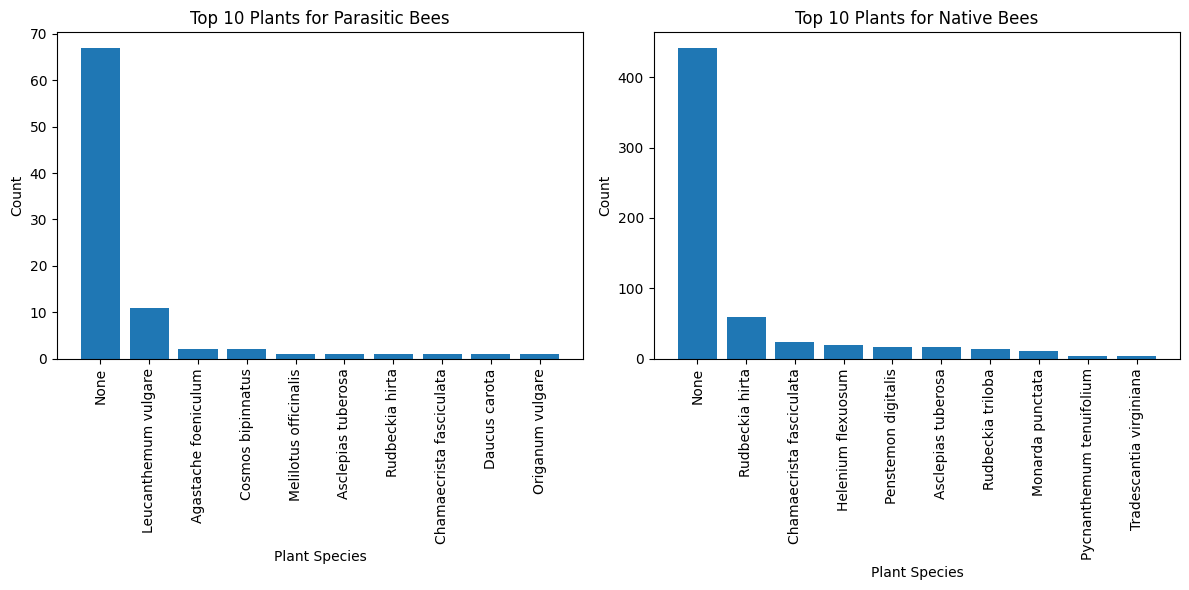

In [183]:
# Filter the dataset for parasitic bees
parasitic_bees = data[data['parasitic'] == 1]

# Get the count of preferred plant species for parasitic bees
parasitic_plants = parasitic_bees['plant_species'].value_counts().head(10)

# Get the count of preferred plant species for native bees
native_plants = data[data['native_or_non'] == 'native']['plant_species'].value_counts().head(10)

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the top 10 plants for parasitic bees
axes[0].bar(parasitic_plants.index, parasitic_plants.values)
axes[0].set_xlabel('Plant Species')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Plants for Parasitic Bees')

# Plot the top 10 plants for native bees
axes[1].bar(native_plants.index, native_plants.values)
axes[1].set_xlabel('Plant Species')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Plants for Native Bees')

# Rotate x-axis labels for better visibility
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [184]:
# Filter the dataset for native bees
native_bees = data[data['native_or_non'] == 'native']

# Get the count of preferred plant species for native bees
native_plants = native_bees['plant_species'].value_counts()

# Filter out the plant species that also attract parasitic bees
non_parasitic_plants = native_plants[~native_plants.index.isin(parasitic_plants.index)]

# Get the top 3 plants for native bees that do not attract parasitic bees
top_native_plants = non_parasitic_plants.head(3)

# Print the top 3 plants
print("Top 3 Plants for Native Bees (Non-Parasitic):")
print(top_native_plants)

Top 3 Plants for Native Bees (Non-Parasitic):
Helenium flexuosum     19
Penstemon digitalis    16
Rudbeckia triloba      13
Name: plant_species, dtype: int64


## The top three plant species I would recommend to the agency to support native bees are below:
## 
## 1. Helenium Flexuosum (Purple-headed Sneezeweed)
## 2. Penstemon Digitalis (Foxglove Beardtongue)
## 3. Rudbeckia Triloba (Brown-eyed Susan)

After reviewing all of the data and then using a process of elimination, these three flowers were the top when it came to attracting pollinator bees and creating a thriving environment. These flowers were also crossed referenced with parasitic bee preferences to ensure there are not additional unintended consequences when 


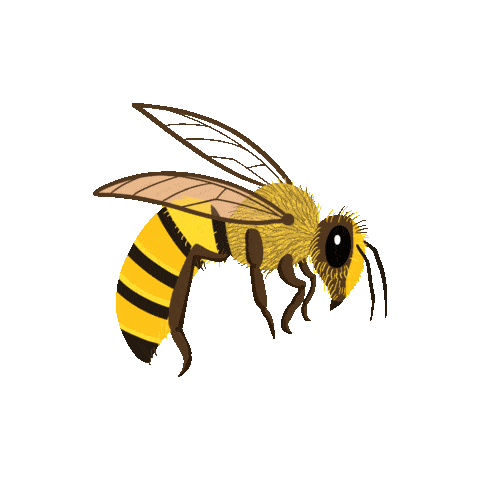

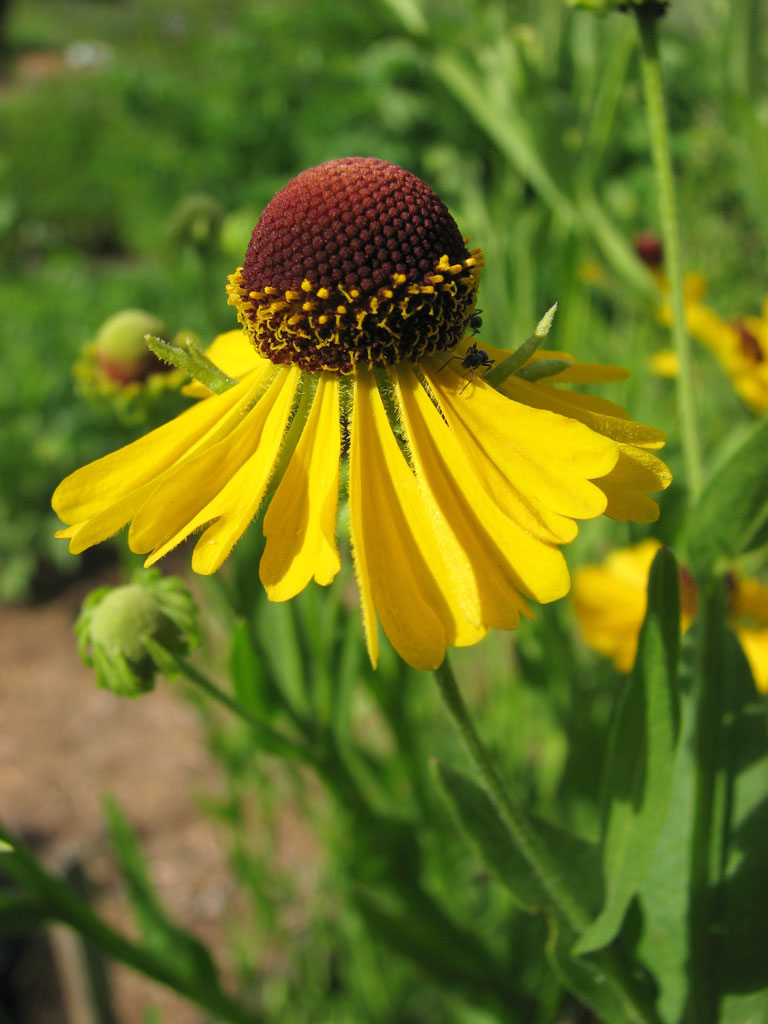

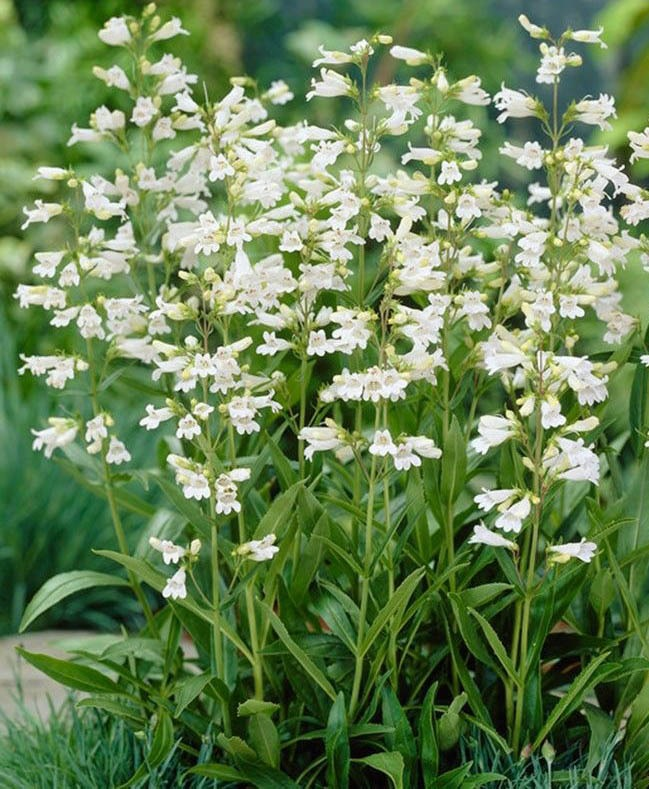

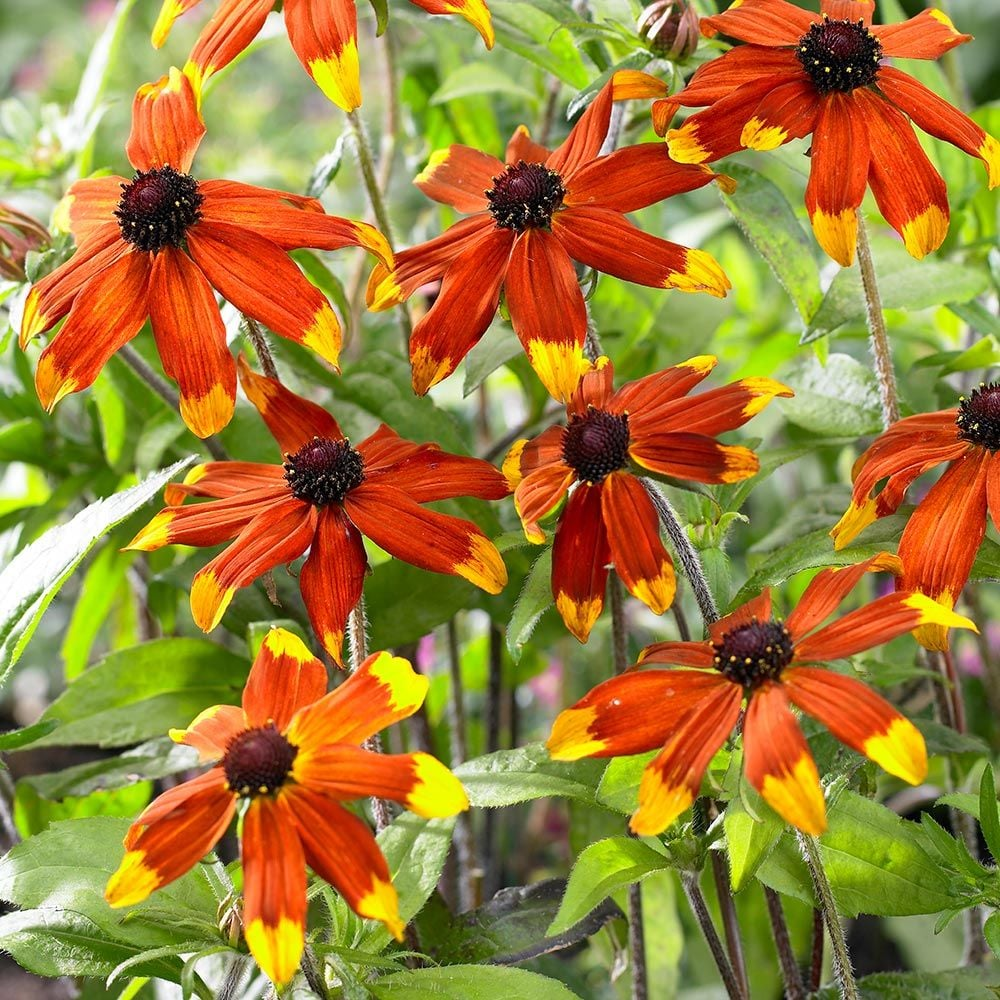

In [189]:
## Specify the file path for the bee animation
bee_animation_path = 'bee_animation.gif'

# Load and display the bee animation
def animate_bee():
    with open(bee_animation_path, 'rb') as f:
        bee_animation_data = f.read()
    bee_animation_base64 = base64.b64encode(bee_animation_data).decode('utf-8')
    return f'<img src="data:image/gif;base64,{bee_animation_base64}">'

bee_animation = animate_bee()

# Specify the file paths for the plant images
plant_image_paths = {
    'Helenium Flexuosum': 'helenium_flexuosum.jpg',
    'Penstemon Digitalis': 'Penstemon_Digitalis.jpg',
    'Rudbeckia Tiloba': 'Rudbeckia_Triloba.jpg'
}

# Display the bee animation
display(HTML(bee_animation))

# Load and display the plant images with bold and centered titles
for plant_name, image_path in plant_image_paths.items():
    # Load the image
    image = Image.open(image_path)
    
    # Create a centered title string with bold formatting and margin
    title = f"<center><b><span style='margin-bottom: 10px;'>{plant_name}</span></b></center>"
    
    # Display the title and the image
    display(HTML(title))
    display(image)

In conclusion, by minimizing the attraction of parasitic bees and focusing on creating an optimized environment for pollinator bees, we can promote the health and thriving of these important species. By understanding the preferences and interactions between bees and flowers, we can make informed decisions in conservation efforts and promote a harmonious symbiotic relationship within ecosystems.

## References:

#### Bee Animation
Photo credit: Gif of Bee from (https://www.icegif.com/bee-11/)
#### Helenium Flexuosum  
Photo credit: Image of Helenium Flexuosum from [Prairie Moon Nursery](https://www.prairiemoon.com/)

#### Penstemon Digitalis  
Photo credit: Image of Penstemon digitalis from [Renaissance Farms](https://renaissancefarms.org)

#### Rudbeckia Tiloba  
Photo credit: Image of Rudbeckia tiloba from [White Flower Farm](https://www.whiteflowerfarm.com)